In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 34.52,
  'feels_like': 32.16,
  'temp_min': 27.95,
  'temp_max': 40.24,
  'pressure': 1030,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 0, 'gust': 8.01},
 'clouds': {'all': 20},
 'dt': 1645505435,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1645443139,
  'sunset': 1645482223},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [7]:
boston_data = city_weather.json()

In [8]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 40.24 76 20 3


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zlatoustovsk
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | guicheng
City not found. Skipping...
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | killam
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | eureka
Processing Record 9 of Set 1 | rudbar
Processing Record 10 of Set 1 | fairbanks
Processing Record 11 of Set 1 | aykhal
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | buraydah
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | lata
Processing Record 20 of Set 1 | sabang
Processing Record 21 of Set 1 | gladstone
Processing Re

Processing Record 36 of Set 4 | hua hin
Processing Record 37 of Set 4 | bethel
Processing Record 38 of Set 4 | mitu
Processing Record 39 of Set 4 | okakarara
Processing Record 40 of Set 4 | dong xoai
Processing Record 41 of Set 4 | cordele
Processing Record 42 of Set 4 | roza
Processing Record 43 of Set 4 | vaxjo
Processing Record 44 of Set 4 | new norfolk
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | kaitangata
Processing Record 47 of Set 4 | srednekolymsk
Processing Record 48 of Set 4 | rio gallegos
Processing Record 49 of Set 4 | bafq
Processing Record 50 of Set 4 | cape town
Processing Record 1 of Set 5 | port alfred
Processing Record 2 of Set 5 | devils lake
Processing Record 3 of Set 5 | bayji
Processing Record 4 of Set 5 | vao
Processing Record 5 of Set 5 | dire dawa
Processing Record 6 of Set 5 | tinskoy
Processing Record 7 of Set 5 | severo-kurilsk
Processing Record 8 of Set 5 | masagua
Processing Record 9 of Set 5 | tevriz
Processing Record 10 of Set 5 

Processing Record 29 of Set 8 | uray
Processing Record 30 of Set 8 | pisco
Processing Record 31 of Set 8 | rio grande
Processing Record 32 of Set 8 | tunduru
City not found. Skipping...
Processing Record 33 of Set 8 | ostersund
Processing Record 34 of Set 8 | payo
Processing Record 35 of Set 8 | kuche
City not found. Skipping...
Processing Record 36 of Set 8 | muroto
Processing Record 37 of Set 8 | zheleznodorozhnyy
Processing Record 38 of Set 8 | khonuu
City not found. Skipping...
Processing Record 39 of Set 8 | vitimskiy
City not found. Skipping...
Processing Record 40 of Set 8 | lieksa
Processing Record 41 of Set 8 | oktyabrskiy
Processing Record 42 of Set 8 | karamea
City not found. Skipping...
Processing Record 43 of Set 8 | sao gabriel da cachoeira
Processing Record 44 of Set 8 | zirandaro
Processing Record 45 of Set 8 | oktyabrskoye
Processing Record 46 of Set 8 | grand gaube
Processing Record 47 of Set 8 | riverton
Processing Record 48 of Set 8 | annau
Processing Record 49 of S

Processing Record 16 of Set 12 | huallanca
Processing Record 17 of Set 12 | moscow
Processing Record 18 of Set 12 | wagar
Processing Record 19 of Set 12 | la paz
Processing Record 20 of Set 12 | chipata
Processing Record 21 of Set 12 | along
Processing Record 22 of Set 12 | tura
Processing Record 23 of Set 12 | sinnamary
Processing Record 24 of Set 12 | warri
Processing Record 25 of Set 12 | pochutla
Processing Record 26 of Set 12 | tancanhuitz
Processing Record 27 of Set 12 | guaymas
Processing Record 28 of Set 12 | kirando
Processing Record 29 of Set 12 | richards bay
Processing Record 30 of Set 12 | hrubieszow
Processing Record 31 of Set 12 | fortuna
Processing Record 32 of Set 12 | byron bay
Processing Record 33 of Set 12 | huangnihe
Processing Record 34 of Set 12 | goodlettsville
Processing Record 35 of Set 12 | nalut
Processing Record 36 of Set 12 | ust-kuyga
Processing Record 37 of Set 12 | arkhangelsk
Processing Record 38 of Set 12 | blytheville
Processing Record 39 of Set 12 |

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,51.46,93,100,20.71,AR,2022-02-22 04:58:21
1,Aklavik,68.2191,-135.0107,-1.48,78,100,23.53,CA,2022-02-22 04:59:52
2,Killam,52.7834,-111.8518,-9.38,84,54,5.75,CA,2022-02-22 04:59:52
3,Rikitea,-23.1203,-134.9692,77.95,70,28,5.59,PF,2022-02-22 04:59:52
4,Vaini,-21.2000,-175.2000,82.56,94,75,10.36,TO,2022-02-22 04:59:53
5,Eureka,40.8021,-124.1637,41.94,79,84,7.00,US,2022-02-22 04:59:43
6,Rudbar,30.1500,62.6000,60.98,43,1,10.40,AF,2022-02-22 04:59:53
7,Fairbanks,64.8378,-147.7164,19.81,84,40,0.00,US,2022-02-22 04:59:54
8,Aykhal,66.0000,111.5000,12.42,80,23,11.23,RU,2022-02-22 04:59:54
9,Nanortalik,60.1432,-45.2371,8.71,74,89,11.14,GL,2022-02-22 04:59:55


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Get today's date in seconds.
today = time.strftime('%x')
today

'02/21/22'

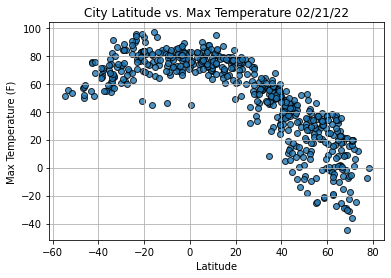

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

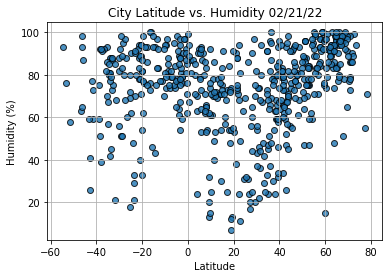

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

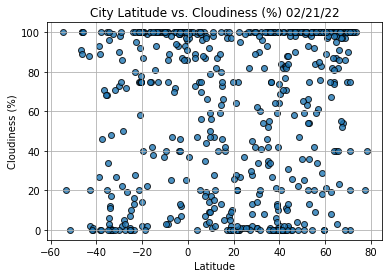

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

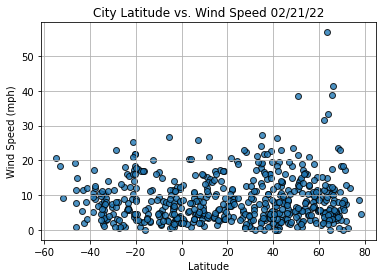

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()